<a href="https://colab.research.google.com/github/yejin0455/sesac-ML/blob/main/D11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-29 06:07:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-29 06:07:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-29 06:07:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape

(300, 100, 100)

In [ ]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [ ]:
def draw_fruits(arr_3d):
  '''
  arr_3d.shape: (sample #, image's width, image's height)
  '''
  n = len(arr_3d)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axes = plt.subplots(rows, cols, squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axes[i, j].imshow(arr_3d[i*10 + j], cmap='gray_r')
      axes[i, j].axis('off')
  plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
pca.components_.shape

(50, 10000)

In [ ]:
pca.components_.reshape(-1, 100, 100).shape

(50, 100, 100)

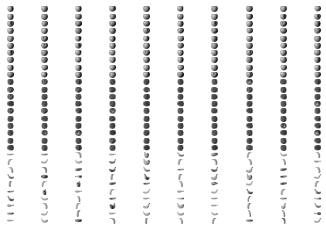

In [ ]:
draw_fruits(fruits)

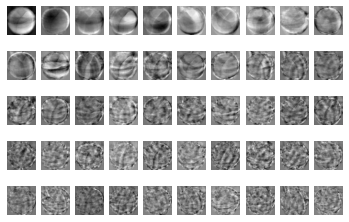

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

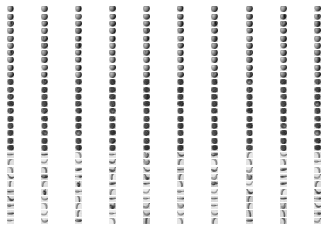

In [ ]:
draw_fruits(fruits_inverse.reshape(-1, 100, 100))

In [ ]:
pca.explained_variance_

array([13825250.21581998,  3244970.17261193,  2147002.11072803,
        1315766.76701661,  1115261.57182826,  1071019.42512485,
         839909.33515212,   670735.97207539,   447908.41101075,
         438278.50229381,   376058.33689843,   308314.27143546,
         286653.15009761,   276360.4125939 ,   226209.96509273,
         210588.2898335 ,   188950.39488299,   166855.20737069,
         158754.23984363,   156784.46249705,   146172.79936253,
         142739.23535024,   133183.26112485,   127122.9177665 ,
         121564.27750427,   117269.48541256,   108180.95823831,
         103730.11373132,    99339.00531972,    99141.42203594,
          94303.03040571,    90021.01778806,    86470.646451  ,
          83498.52523462,    82292.29862198,    80723.01623902,
          78128.29900977,    75352.2033184 ,    72167.1631672 ,
          70789.00868504,    69678.60730152,    63666.06759641,
          62909.61352412,    62331.09838946,    60287.19814017,
          59769.87091015,    56675.96669

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486382, 0.00480347,
       0.00447836, 0.00437316, 0.00408039, 0.00389472, 0.00372442,
       0.00359284, 0.00331439, 0.00317802, 0.00304349, 0.00303744,
       0.0028892 , 0.00275801, 0.00264924, 0.00255818, 0.00252122,
       0.00247315, 0.00239365, 0.0023086 , 0.00221102, 0.00216879,
       0.00213477, 0.00195056, 0.00192739, 0.00190966, 0.00184704,
       0.0018312 , 0.00173641, 0.00169988, 0.00162805, 0.00158466])

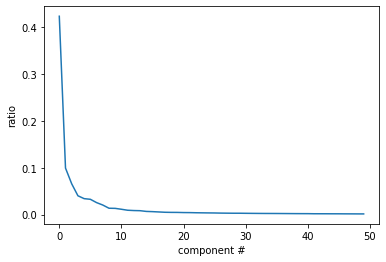

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('component #')
plt.ylabel('ratio')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

In [ ]:
fruits_2d.shape

(300, 10000)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 0.9966666666666667
fitted time: 1.708311128616333


In [ ]:
fruits_pca.shape

(300, 50)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 1.0
fitted time: 0.02920050621032715


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.components_.shape 

(2, 10000)

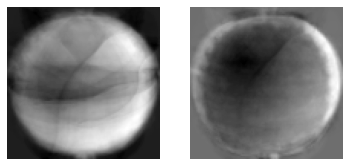

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 0.9933333333333334
fitted time: 0.03998208045959473


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

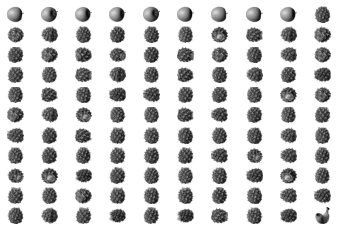

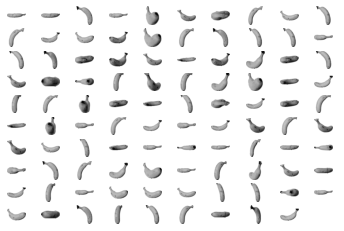

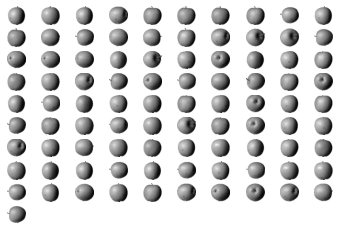

In [ ]:
for label in range(3):
  draw_fruits(fruits[km.labels_ == label])

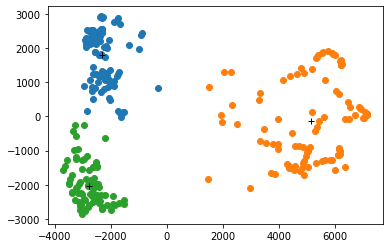

In [ ]:
for label in range(3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
  plt.plot(km.cluster_centers_[label, 0], km.cluster_centers_[label, 1], 'k+')
plt.show()

In [ ]:
km.cluster_centers_

array([[-2307.63227673,  1803.02129885],
       [ 5133.41018575,  -130.21800791],
       [-2795.25338406, -2037.81055044]])